# Logistic regression with Python statsmodels

Blog's page:

https://mashimo.wordpress.com/2017/07/26/logistic-regression-with-python-statsmodels/

GitHub webpage:

https://github.com/Mashimo/datascience/blob/master/01-Regression/LogisticRegressionSM.ipynb

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/SaveTheRbtz/ml-class/master/ex2/ex2data1.txt", header=None, names=['Exam1', 'Exam2', 'Admitted'])

In [3]:
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
X = data.copy() # ou training data

In [5]:
y = X.Admitted.copy() # copy “y” column values out
X.drop(['Admitted'], axis=1, inplace=True) # then, drop y column

In [6]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Admitted, dtype: int64

In [7]:
X.head()

,Exam1,Exam2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [8]:
# manually add the intercept
X['intercept'] = 1.0  # so we don't need to use sm.add_constant every time

In [9]:
import statsmodels.formula.api as smf

In [10]:
import statsmodels
print(statsmodels.__version__)  

0.10.1


In [11]:
m3 = statsmodels.discrete.discrete_model.Logit(y,X)

In [12]:
result = m3.fit()

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations 9


In [13]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Wed, 11 Sep 2019   Pseudo R-squ.:                  0.6976
Time:                        18:51:31   Log-Likelihood:                -20.350
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                 4.067e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Exam1          0.2062      0.048      4.296      0.000       0.112       0.300
Exam2          0.2015      0.049      4.143      0.000       0.106       0.297
intercept    -25.1613      5.799     -4.339      0.000     -36.526     -13.796
==============================================================================
"""

In [14]:
coefficients = result.params
coefficients

Exam1         0.206232
Exam2         0.201472
intercept   -25.161334
dtype: float64

In [17]:
result.conf_int()

,0,1
Exam1,0.112152,0.300311
Exam2,0.106168,0.296775
intercept,-36.526287,-13.796380


In [18]:
import numpy as np

In [20]:
# odds ratios and 95% CI
confidenceInterval = result.conf_int()
confidenceInterval

,0,1
Exam1,0.112152,0.300311
Exam2,0.106168,0.296775
intercept,-36.526287,-13.796380


In [21]:
coefficients

Exam1         0.206232
Exam2         0.201472
intercept   -25.161334
dtype: float64

In [22]:
confidenceInterval['OddsRatio'] = coefficients

In [23]:
confidenceInterval

,0,1,OddsRatio
Exam1,0.112152,0.300311,0.206232
Exam2,0.106168,0.296775,0.201472
intercept,-36.526287,-13.796380,-25.161334


In [24]:
confidenceInterval.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(confidenceInterval)

,2.5%,97.5%,OddsRatio
Exam1,1.118683e+00,1.350279,1.229038e+00
Exam2,1.112009e+00,1.345512,1.223201e+00
intercept,1.370361e-16,0.000001,1.181875e-11


In [25]:
plot_x = np.array([ 95.60854757,  21.63578984])

In [26]:
line_intercept = -coefficients['intercept'] / coefficients['Exam2']
line_slope = -coefficients['Exam1'] / coefficients['Exam2']

In [27]:
line_intercept

124.88774354024942

In [28]:
line_slope

-1.0236267188108765

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
colours = ['red' if i==0 else 'green' for i in y] # red not admitted, green yes.

In [32]:
# Create a list of values in the best fit line
plot_y = [line_slope * i + line_intercept for i in plot_x]
plot_y

[27.020279700896722, 102.74077097744852]

Text(0.5, 0.98, 'Student admission vs. past two exams')

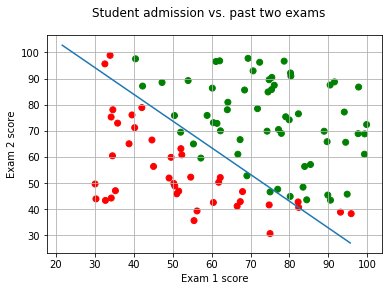

In [33]:
fig,ax = plt.subplots()
ax.scatter(X.Exam1, X.Exam2, c=colours)
ax.plot(plot_x, plot_y)
ax.grid(True)
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")
fig.suptitle("Student admission vs. past two exams")

In [34]:
def logPredict(modelParams, X):  
    probabilities = modelParams.predict(X)
    return [1 if x >= 0.5 else 0 for x in probabilities]

In [35]:
predictions = logPredict(result, X)

In [36]:
accuracy = np.mean(predictions == y)
print ('accuracy = {0}%'.format(accuracy*100)  )

accuracy = 89.0%
